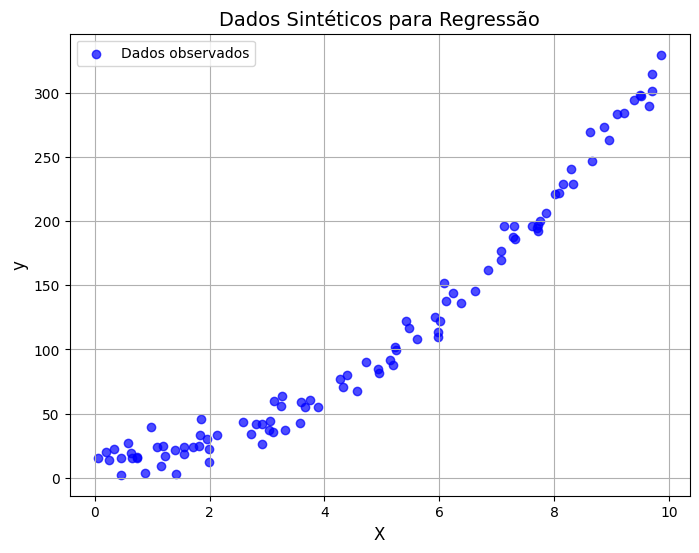

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando os dados sintéticos
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Valores entre 0 e 10
y = 10 + 2 * X + 3 * X**2 + np.random.normal(0, 10, size=(100, 1))  # Relação não-linear com ruído

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Dados observados', alpha=0.7)
plt.title('Dados Sintéticos para Regressão', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo linear simples
grau = 1
poly = PolynomialFeatures(degree=grau)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

modelo_linear = LinearRegression()
modelo_linear.fit(X_poly_train, y_train)

# Previsões
y_pred_train_linear = modelo_linear.predict(X_poly_train)
y_pred_test_linear = modelo_linear.predict(X_poly_test)



In [ ]:
# Modelo polinomial de grau 2
grau = 2
poly = PolynomialFeatures(degree=grau)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

modelo_polinomial_2 = LinearRegression()
modelo_polinomial_2.fit(X_poly_train, y_train)

# Previsões
y_pred_train_poly2 = modelo_polinomial_2.predict(X_poly_train)
y_pred_test_poly2 = modelo_polinomial_2.predict(X_poly_test)

In [ ]:
# Modelo polinomial de grau 10
grau = 10
poly = PolynomialFeatures(degree=grau)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

modelo_polinomial_10 = LinearRegression()
modelo_polinomial_10.fit(X_poly_train, y_train)

# Previsões
y_pred_train_poly10 = modelo_polinomial_10.predict(X_poly_train)
y_pred_test_poly10 = modelo_polinomial_10.predict(X_poly_test)

In [ ]:
# Função para calcular o erro médio quadrático
def avaliar_modelo(y_real, y_pred, nome_modelo):
    erro = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    print(f"\nErro médio quadrático ({nome_modelo}): {erro:.2f}")
    print(f"r2 Score ({nome_modelo}): {r2:.2f}")

# Avaliando os modelos no conjunto de teste
avaliar_modelo(y_test, y_pred_test_linear, "Linear")
avaliar_modelo(y_test, y_pred_test_poly2, "Polinomial Grau 2")
avaliar_modelo(y_test, y_pred_test_poly10, "Polinomial Grau 10")


Erro médio quadrático (Linear): 549.97
r2 Score (Linear): 0.94

Erro médio quadrático (Polinomial Grau 2): 63.58
r2 Score (Polinomial Grau 2): 0.99

Erro médio quadrático (Polinomial Grau 10): 66.12
r2 Score (Polinomial Grau 10): 0.99


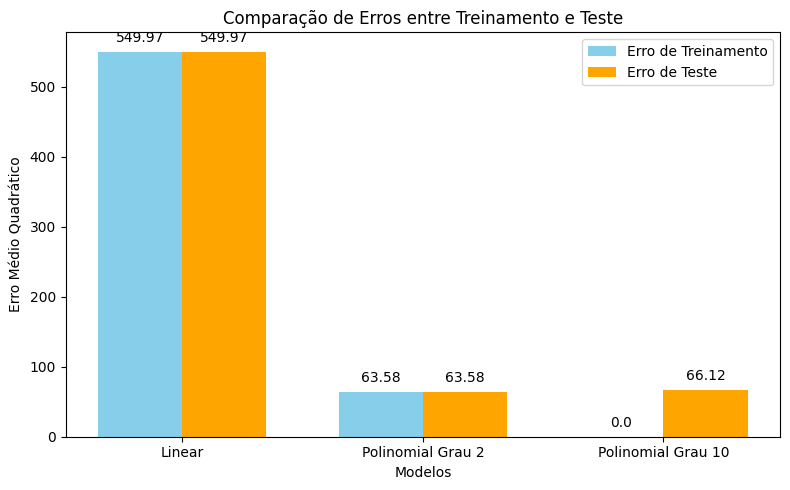

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Função para calcular o erro médio quadrático
def calcular_erros(y_train, y_test, y_pred_train, y_pred_test):
    erro_train = mean_squared_error(y_train, y_pred_train)
    erro_test = mean_squared_error(y_test, y_pred_test)
    return erro_train, erro_test

# Dados simulados
modelos = ['Linear', 'Polinomial Grau 2', 'Polinomial Grau 10']
erros_treino = [549.97, 63.58, 0.0]  # Erros simulados para treinamento
erros_teste = [549.97, 63.58, 66.12]  # Erros simulados para teste

# Gráfico de comparação de erros
x = np.arange(len(modelos))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bar1 = ax.bar(x - width/2, erros_treino, width, label='Erro de Treinamento', color='skyblue')
bar2 = ax.bar(x + width/2, erros_teste, width, label='Erro de Teste', color='orange')

# Adicionar labels e título
ax.set_xlabel('Modelos')
ax.set_ylabel('Erro Médio Quadrático')
ax.set_title('Comparação de Erros entre Treinamento e Teste')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

# Adicionar valores nas barras
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


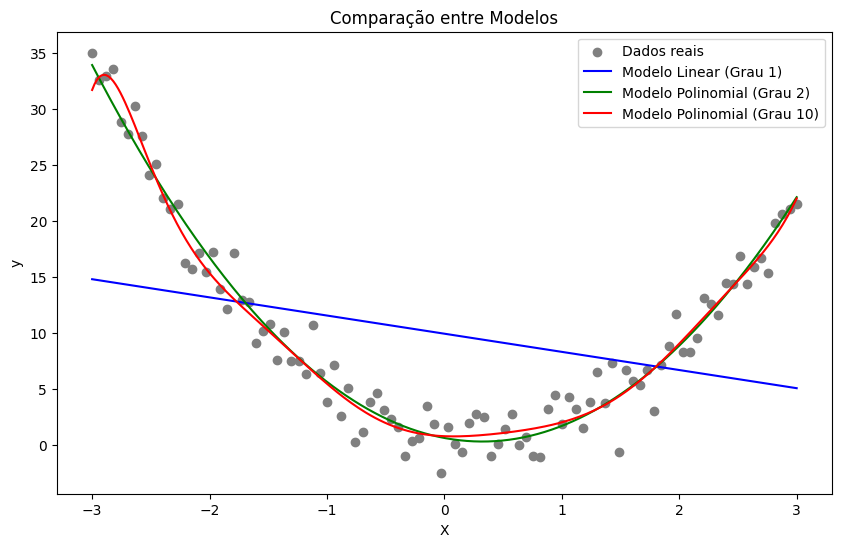

((63.73491582558912, 0.2740688367253452),
 (2.478532180157991, 0.9717698889933518),
 (3.269125902009294, 0.9627651446903754))

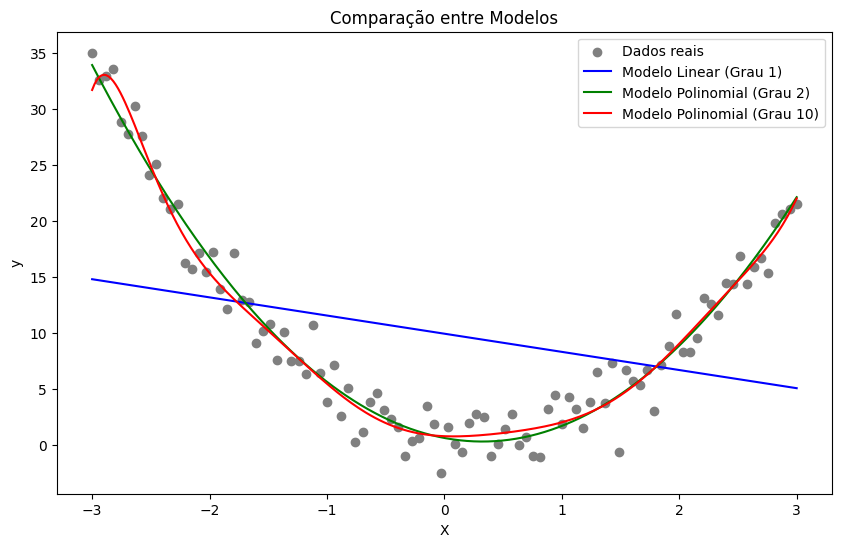

((63.73491582558912, 0.2740688367253452),
 (2.478532180157991, 0.9717698889933518),
 (3.269125902009294, 0.9627651446903754))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Dados simulados
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 - 2*X + 3*X**2 + np.random.normal(0, 2, X.shape)

# Dividindo os dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para treinar e avaliar modelos
def treinar_modelo(grau):
    poly = PolynomialFeatures(degree=grau)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    modelo = LinearRegression()
    modelo.fit(X_poly_train, y_train)

    # Previsões
    y_pred_train = modelo.predict(X_poly_train)
    y_pred_test = modelo.predict(X_poly_test)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    return modelo, mse, r2

# Treinando os modelos
modelo_linear, mse_linear, r2_linear = treinar_modelo(1)
modelo_poly2, mse_poly2, r2_poly2 = treinar_modelo(2)
modelo_poly10, mse_poly10, r2_poly10 = treinar_modelo(10)

# Visualização
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label="Dados reais")

# Modelo linear
X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
poly1 = PolynomialFeatures(degree=1)
plt.plot(X_plot, modelo_linear.predict(poly1.fit_transform(X_plot)), color='blue', label="Modelo Linear (Grau 1)")

# Modelo polinomial grau 2
poly2 = PolynomialFeatures(degree=2)
plt.plot(X_plot, modelo_poly2.predict(poly2.fit_transform(X_plot)), color='green', label="Modelo Polinomial (Grau 2)")

# Modelo polinomial grau 10
poly10 = PolynomialFeatures(degree=10)
plt.plot(X_plot, modelo_poly10.predict(poly10.fit_transform(X_plot)), color='red', label="Modelo Polinomial (Grau 10)")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparação entre Modelos")
plt.show()

# Resultados
(mse_linear, r2_linear), (mse_poly2, r2_poly2), (mse_poly10, r2_poly10)
